In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# reading the tweet_cluster_mapping csv file and splitting it to training and testing datasets
df = pd.read_csv('tweet_cluster_mapping.csv')

X = df['tweet']
y = df['cluster_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [3]:
# training multiple classifiers at the same time to choose the best performing model
# using a cross-validation of 5 and averaging the accuracies of all the classifiers
# to choose the best performing model

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

features = tfidf.fit_transform(df['tweet']).toarray()
labels = df['cluster_number']

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

print(cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.270992
1   RandomForestClassifier         1  0.269720
2   RandomForestClassifier         2  0.270992
3   RandomForestClassifier         3  0.270992
4   RandomForestClassifier         4  0.270064
5                LinearSVC         0  0.344784
6                LinearSVC         1  0.367684
7                LinearSVC         2  0.372774
8                LinearSVC         3  0.333333
9                LinearSVC         4  0.379618
10           MultinomialNB         0  0.366412
11           MultinomialNB         1  0.349873
12           MultinomialNB         2  0.366412
13           MultinomialNB         3  0.349873
14           MultinomialNB         4  0.349045
15      LogisticRegression         0  0.384224
16      LogisticRegression         1  0.374046
17      LogisticRegression         2  0.395674
18      LogisticRegression         3  0.358779
19      LogisticRegression         4  0.368153


In [4]:
# get the mean of each model from the cross-validation scores to choose the best performing model
print(cv_df.groupby('model_name').accuracy.mean())

model_name
LinearSVC                 0.359639
LogisticRegression        0.376175
MultinomialNB             0.356323
RandomForestClassifier    0.270552
Name: accuracy, dtype: float64


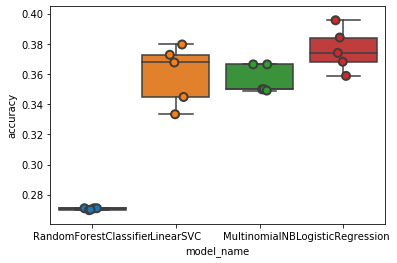

In [5]:
# pictorial representation of all the models
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [6]:
# the best performing model is - LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = \
    train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
# computing the confusion matrix for the best performing model
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 62,  77,   4,   9,   2,  32,  11],
       [ 20, 248,   7,   4,   3,  48,  10],
       [ 15,  68,  15,   5,   1,  34,   7],
       [ 15,  50,   3,  17,   3,  10,   1],
       [ 21,  56,   7,   3,  12,  20,   4],
       [ 37, 103,   6,   1,   2, 121,   5],
       [ 18,  54,   2,   2,   1,  20,  21]])

In [8]:
# computing the metrics for evaluation
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.33      0.31      0.32       197
         1.0       0.38      0.73      0.50       340
         2.0       0.34      0.10      0.16       145
         3.0       0.41      0.17      0.24        99
         4.0       0.50      0.10      0.16       123
         5.0       0.42      0.44      0.43       275
         6.0       0.36      0.18      0.24       118

    accuracy                           0.38      1297
   macro avg       0.39      0.29      0.29      1297
weighted avg       0.39      0.38      0.34      1297

